# Class mapping exercise
Choose one of the map ideas below, processed the data with GeoPandas and export the data to QGIS for presentation. *Hint: You might need to change data types using the `dtype` argument when importing files so that you can merge with FIPS and ZIP codes effectively.*

#### Load python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

### Election map
#### What percentage of vote did Biden/Trump receive in California counties?

In [4]:
# Values: https://raw.githubusercontent.com/stiles/notebooks/master/elections/data/ca_counties_election_results_2020.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/counties_simple.geojson

#### Read election results

In [4]:
election_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/notebooks/master/elections/data/ca_counties_election_results_2020.csv"
)

In [5]:
election_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/counties_simple.geojson"
)

#### Read county boundaries

In [6]:
election_df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,winner
0,California,1,Alameda,136309,617659,769864,-481350,0.177056,0.802296,0.625240,Biden
1,California,3,Alpine,244,476,741,-232,0.329285,0.642375,0.313090,Biden
2,California,5,Amador,13585,8153,22302,5432,0.609138,0.365573,0.243566,Trump
3,California,7,Butte,48730,50426,102042,-1696,0.477548,0.494169,0.016621,Biden
4,California,9,Calaveras,16518,10046,27164,6472,0.608084,0.369828,0.238257,Trump


In [7]:
election_gdf.head()

,county_name,county_fips,geometry
0,Alameda,001,"POLYGON ((-122.27125 37.90503, -122.27024 37.9..."
1,Alpine,003,"POLYGON ((-119.58667 38.71420, -119.58653 38.7..."
2,Amador,005,"POLYGON ((-120.07246 38.70276, -120.07249 38.6..."
3,Butte,007,"POLYGON ((-121.07661 39.59729, -121.07945 39.5..."
4,Calaveras,009,"POLYGON ((-120.01792 38.43586, -120.01788 38.4..."


<AxesSubplot:>

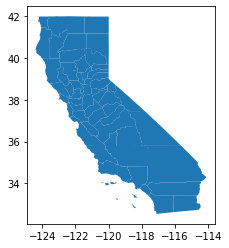

In [8]:
election_gdf.plot()

#### Merge the two 

In [10]:
election_county = pd.merge(election_gdf, election_df, on="county_name")

<AxesSubplot:>

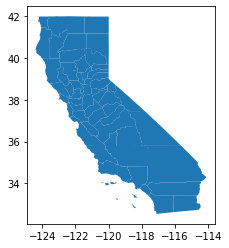

In [11]:
election_county.plot()

In [12]:
election_county.head()

,county_name,county_fips_x,geometry,state_name,county_fips_y,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,winner
0,Alameda,001,"POLYGON ((-122.27125 37.90503, -122.27024 37.9...",California,1,136309,617659,769864,-481350,0.177056,0.802296,0.625240,Biden
1,Alpine,003,"POLYGON ((-119.58667 38.71420, -119.58653 38.7...",California,3,244,476,741,-232,0.329285,0.642375,0.313090,Biden
2,Amador,005,"POLYGON ((-120.07246 38.70276, -120.07249 38.6...",California,5,13585,8153,22302,5432,0.609138,0.365573,0.243566,Trump
3,Butte,007,"POLYGON ((-121.07661 39.59729, -121.07945 39.5...",California,7,48730,50426,102042,-1696,0.477548,0.494169,0.016621,Biden
4,Calaveras,009,"POLYGON ((-120.01792 38.43586, -120.01788 38.4...",California,9,16518,10046,27164,6472,0.608084,0.369828,0.238257,Trump


In [13]:
election_county.to_file(
    "../data/geo/california_election_county_data.geojson", driver="GeoJSON"
)

---

### Vehicle map
##### What's the Tesla ownership rate by LA ZIP Codes?

In [5]:
# Values: https://raw.githubusercontent.com/stiles/notebooks/master/california-fuel-vehicles/output/tesla_zips_slim.csv
# Geo: https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips_simple.geojson.json

#### Read Tesla data

In [14]:
tesla_zips = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/notebooks/master/california-fuel-vehicles/output/tesla_zips_slim.csv"
)

In [16]:
ca_zips = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips_simple.geojson.json"
)

#### Read ZIP Codes geo file

In [17]:
tesla_zips.head()

,zip,name,teslas,all_vehicles,tesla_rate_1k,avg_house_income,avg_net_worth
0,90004,Los Angeles,200,22734,8.80,65893,232653
1,90005,Los Angeles,58,12518,4.63,53191,105569
2,90006,Los Angeles,26,17324,1.50,42242,39289
3,90007,Los Angeles,27,10707,2.52,38564,39966
4,90008,Los Angeles,54,12611,4.28,56286,284531


In [18]:
ca_zips.head()

,id,name,county_name,geometry
0,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.25996 33.9..."
1,90002,Los Angeles,Los Angeles County,"POLYGON ((-118.23085 33.95772, -118.23160 33.9..."
2,90003,Los Angeles,Los Angeles County,"POLYGON ((-118.28268 33.98926, -118.28383 33.9..."
3,90004,Los Angeles,Los Angeles County,"MULTIPOLYGON (((-118.33852 34.06891, -118.3371..."
4,90005,Los Angeles,Los Angeles County,"POLYGON ((-118.31879 34.05514, -118.30658 34.0..."


<AxesSubplot:>

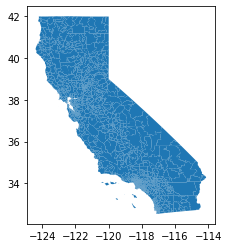

In [19]:
ca_zips.plot()

In [24]:
ca_zips = ca_zips["id"].astype(int)

#### Merge the two

In [28]:
ca_tesla_zips = pd.merge(ca_zips, tesla_zips, left_on="id", right_on="zip")

In [30]:
ca_tesla_zips.head()

,id,zip,name,teslas,all_vehicles,tesla_rate_1k,avg_house_income,avg_net_worth
0,90004,90004,Los Angeles,200,22734,8.80,65893,232653
1,90005,90005,Los Angeles,58,12518,4.63,53191,105569
2,90006,90006,Los Angeles,26,17324,1.50,42242,39289
3,90007,90007,Los Angeles,27,10707,2.52,38564,39966
4,90008,90008,Los Angeles,54,12611,4.28,56286,284531


#### Export merged geo file

In [35]:
# ca_tesla_zips.to_file("../data/geo/tesla_california_counties.geojson",driver="GeoJSON")

---

### Population map
##### How's the white population distributed in LA by neighborhood? 

In [6]:
# Values:https://raw.githubusercontent.com/stiles/usc/main/data/processed/la_neighborhood_demographics.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/la-neighborhoods.geojson

#### Read race/ethnicity data

#### Read LA neighborhoods geo file

#### Merge the two

#### Export merged geo file